# **Linear regression implementation using numpy**

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as SK_LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 

## Data preparation using Pandas

In [212]:
data = pd.read_csv('./car_dataset/car data.csv')
# I hate underscores
data.columns = data.columns.map(
    lambda x: ' '.join(x.split('_'))
    )
data.head(2)

,Car Name,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [213]:
# Encoding Categorical Data
data = data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}})
data = data.replace({'Seller Type':{'Dealer':0,'Individual':1}})
data = data.replace({'Transmission':{'Manual':0,'Automatic':1}})

C:\Users\Henti\AppData\Local\Temp\ipykernel_17356\2343027753.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}})
C:\Users\Henti\AppData\Local\Temp\ipykernel_17356\2343027753.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Seller Type':{'Dealer':0,'Individual':1}})
C:\Users\Henti\AppData\Local\Temp\ipykernel_17356\2343027753.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [215]:
data = data.drop('Car Name', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling Price  301 non-null    float64
 2   Present Price  301 non-null    float64
 3   Kms Driven     301 non-null    int64  
 4   Fuel Type      301 non-null    int64  
 5   Seller Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


### Trying Robust scaler:

In [217]:
data.describe()

,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [218]:
data[data.columns] = RobustScaler().fit_transform(data)

In [219]:
data.describe()

,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,-0.093023,0.208097,0.141204,0.146510,0.212625,0.352159,0.132890,0.043189
std,0.722889,0.996630,0.993576,1.151624,0.425801,0.478439,0.340021,0.247915
min,-2.750000,-0.686275,-0.698851,-0.932863,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.529412,-0.597701,-0.503450,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.470588,0.402299,0.496550,0.000000,1.000000,0.000000,0.000000
max,1.000000,6.156863,9.908046,13.859685,2.000000,1.000000,1.000000,3.000000


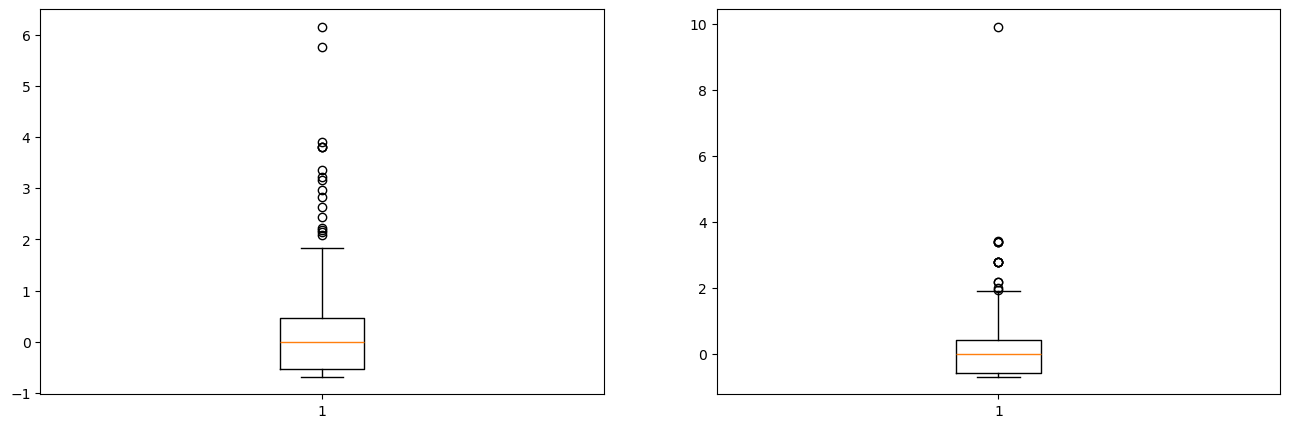

In [220]:
fig, (ax_selling, ax_present) = plt.subplots(1, 2, figsize=(16, 5))
ax_selling.boxplot(data['Selling Price'])
ax_present.boxplot(data['Present Price'])
plt.show()
# plt.scatter(data['Selling Price'], data['Present Price'], s=1)

## Estimation using sk-learn LinearRegression class

In [221]:
X = data.drop(['Selling Price'], axis=1)
Y = data['Selling Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [222]:
X_train.shape, X_test.shape

((210, 7), (91, 7))

### Scores using 'Present Price' feature only:
 - Train score: 0.7912190751012238
 - Test score: 0.6873518619001651


In [223]:
model = SK_LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(f"Train score: {r2_score(Y_train, model.predict(X_train))}")
print(f"Test score: {r2_score(Y_test, Y_pred)}")

Train score: 0.8922254971900911
Test score: 0.7324163242472084


## Linear Regression (n-dimensional) implementation

In [224]:
class LinearRegression():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        # n - sample size, m - number of features
        self.n, self.m = self.X.shape 
        self.reset_weights()
        # self.normalize()
        self.X, self.X_min, self.X_max   = self.normalize(self.X)
        self.Y, self.Y_min, self.Y_max = self.normalize(self.Y)

    @staticmethod
    def normalize(data):
        data_min, data_max = data.min(axis=0), data.max(axis=0)
        return (data - data_min) / ( data_max - data_min), data_min, data_max

    def reset_weights(self):
        self.W = np.zeros((self.m, 1))
        self.b = 0
        self.err_history = []

    def denormalize(self, data, min_val, max_val):
        return data * (max_val - min_val) + min_val

    def predict(self, new_X, denormalize=True):
        y_hat = new_X@self.W + self.b
        if denormalize:
            y_hat = self.denormalize( y_hat, self.Y_min, self.Y_max )
        return y_hat

    def train(self, alpha=0.01, epochs=10, minimum=0.01):
        self.reset_weights()

        for epoch in range(epochs):
            Y_hat = self.X@self.W + self.b
            
            gradient = alpha * self.X.T @ (self.Y-Y_hat) * (-1)
            self.W -= gradient
            self.b -= alpha * (-1) * (self.Y-Y_hat).mean()

            MSE_error = (0.5*(self.Y - Y_hat)**2).mean()
            self.err_history.append(MSE_error)

            if MSE_error <= minimum:
                print(f"Minimim break on {epoch}")
                break

LR = LinearRegression(X_train.to_numpy(), Y_train.to_numpy()[..., np.newaxis])

In [225]:
LR.X.shape, LR.Y.shape

((210, 7), (210, 1))

In [226]:
LR.train(alpha=0.001, epochs=100, minimum=0.001)

Train score: -0.8446841332936899
Test score: -2.864796691043023


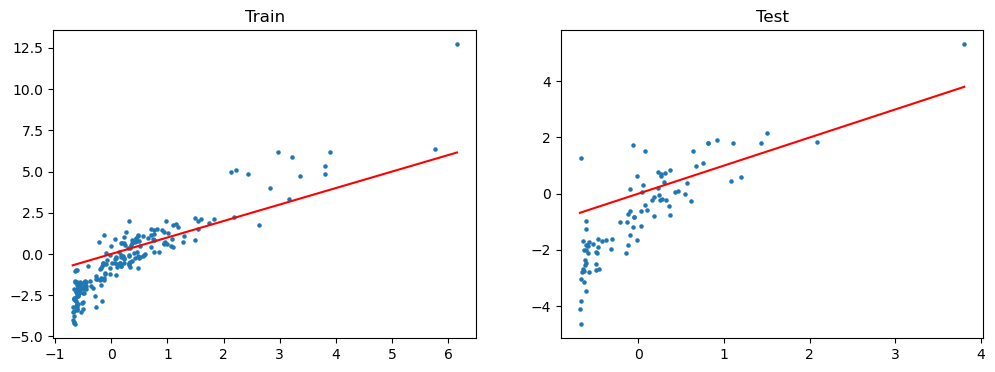

In [242]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))

for ax, (x_true, y_true), title in zip(axis, [(X_train, Y_train), (X_test, Y_test)], ('Train', 'Test')):
    x_true, y_true = x_true.to_numpy(), y_true.to_numpy()
    y_hat = LR.predict(x_true).flatten() ## to do_ auto-normalization inside .predict() method
    ax.scatter(y_true, y_hat, s=5)
    # x=y line plot 
    ax.plot((y_true.min(), y_true.max()), (y_true.min(), y_true.max()), c='red')
    ax.set_title(title)
    print(f"{title} score: {r2_score( y_true, y_hat)}")

plt.show()

[0.02274331452435491, 0.01920166604211448, 0.016613317710863332, 0.014689050568750106, 0.013230729013403848, 0.012102299845283682, 0.011210054243056456, 0.010489191443118237, 0.009894669797228025, 0.009394974974771418, 0.008967873196629762, 0.00859751540487568, 0.00827246099071571, 0.007984327598171661, 0.007726867322748005, 0.007495333433269953, 0.00728604515241735, 0.0070960875612253406, 0.006923103782645732, 0.006765150267706395, 0.006620595308117615, 0.0064880472280028426, 0.00636630301480447, 0.006254311081565398, 0.0061511438493032, 0.006055977198103028, 0.005968074762273974, 0.005886775676820595, 0.005811484813716425, 0.005741664841076344, 0.005676829639885616, 0.0056165387511069335, 0.005560392620930645, 0.005508028477391997, 0.005459116716902485, 0.005413357710796869, 0.005370478964121166, 0.005330232574535421, 0.005292392950395287, 0.005256754755184251, 0.005223131051434806, 0.005191351621745669, 0.005161261447915266, 0.0051327193318726734, 0.005105596644206022, 0.00507977618

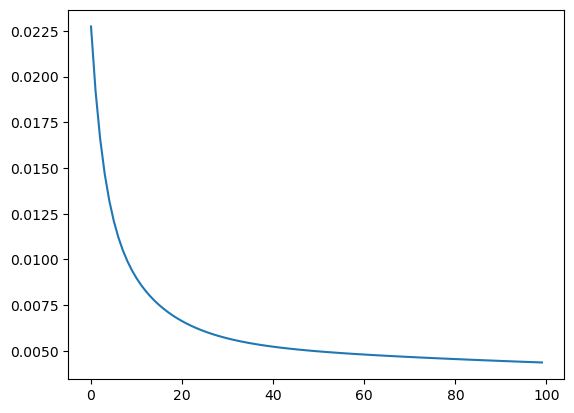

In [243]:
print(LR.err_history)
plt.plot( LR.err_history )
plt.show()

In [244]:
X_1d = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y_1d = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

X_1d = np.array(X_1d).reshape(len(X_1d), 1)
y_1d = np.array(y_1d).reshape(len(y_1d), 1)
X_1d.shape, y_1d.shape
# plt.scatter(X_1d, y_1d)

((41, 1), (41, 1))

In [245]:
LR_1d = LinearRegression(X_1d, y_1d)
LR_1d.train(alpha=0.01, epochs=100, minimum=0.001)

[[0.83124432]] 0.02595538373527543


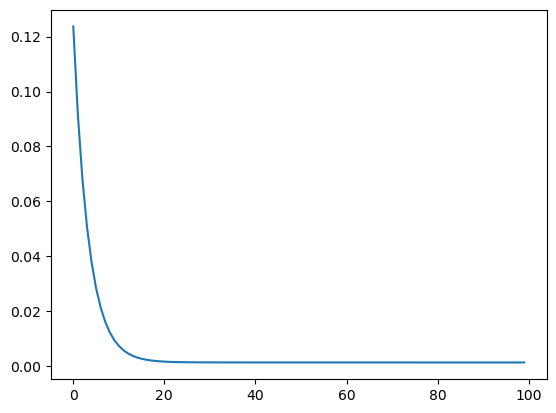

In [246]:
print(LR_1d.W, LR_1d.b)
plt.plot( LR_1d.err_history )
plt.show()

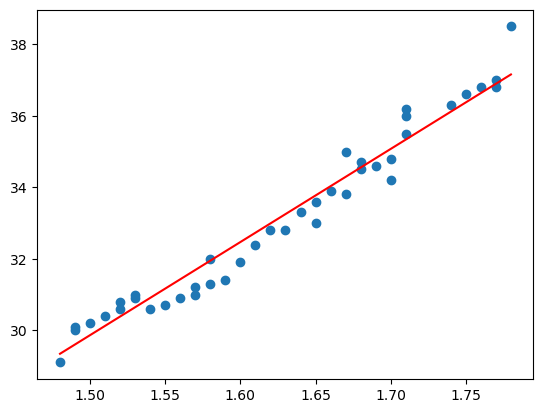

In [247]:
plt.scatter(X_1d, y_1d)
plt.plot( X_1d, LR_1d.predict(LR_1d.X), c='red' )

In [248]:

class KD_LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape     # X shape [N, f]
        self.weights = np.random.rand(num_features)  # W shape [f, 1]
        self.bias = 0
        err_history = []

        for i in range(self.n_iters):

            # y_pred shape should be N, 1
            y_pred = np.dot(X, self.weights) + self.bias

            # X -> [N,f]
            # y_pred -> [N]
            # dw -> [f]
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            err_history.append( ((y_pred-y)**2).mean() )

        return err_history

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Tesing results, Comparing to the Sk-learn implementation:

In [2]:
X = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

X = np.array(X)
y = np.array(y)

In [ ]:
# импортируем библиотеку Numpy
import numpy as np

# преобразуем наш список X сначала в одномерный массив Numpy, а затем добавим второе измерение
X = np.array(X).reshape(-1, 1)

# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
# т.е. найдем те самые веса или наклон и сдвиг прямой с помощью функции потерь
model.fit(X, y)

LinearRegression()

In [ ]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[26.86181201] -10.570936299787334


Новое уравнение, найдено с помощью библиотеки Scikit-learn:

$$ y = 26.86x - 10.57 $$

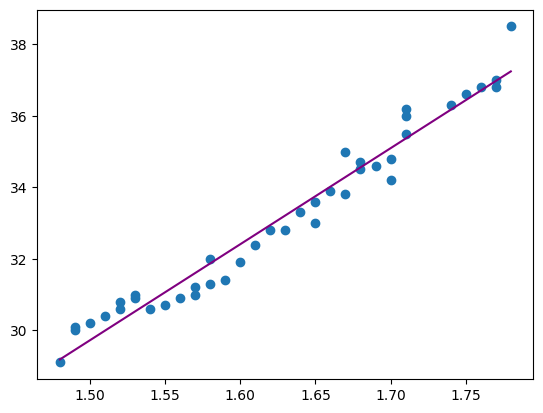

In [ ]:
y_sklearn = lambda x: model.coef_*x + model.intercept_
plt.scatter(X, y)
plt.plot( X, y_sklearn(X), c='purple' )

In [ ]:
# на основе значений роста (Х) предскажем значения обхвата шеи
y_pred = model.predict(X)

# выведем первые пять значений, с помощью диапазоне индексов
print(y_pred[:5])

[29.18454547 29.45316359 29.45316359 29.72178171 29.99039983]


In [ ]:
# импортируем модуль метрик, то есть измерений качества моделей
from sklearn import metrics
# выведем ту самую среднюю сумму расстояний или, говоря более корректно,
# среднеквадратическую ошибку
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))

Mean Squared Error (MSE): 0.00257287870832655


In [ ]:
# избавимся от квадрата в вычислениях, возьмем квадратный корень из нашей метрики
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error (RMSE): 0.05072355181103301


In [ ]:
# сравним RMSE со средним обхватом шеи: модель неплохо обучилась!!!
y.mean()

0.42579138557343005